In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sps
import seaborn as sns
import sklearn.metrics as metrics

from lib.ml import em


sns.set_style('whitegrid')

### Simple data

In [2]:
data = pd.DataFrame({
    'visits': [11, 5, 6, 10],
    'host': ['yandex', 'google', 'yandex', 'google'],
})
data

,visits,host
0,11,yandex
1,5,google
2,6,yandex
3,10,google


In [3]:
embedder = em.EMEmbedder(
    embed_size=2,
    features={
        'visits': 'counter',
        'host': 'categ',
    },
    max_iter=10,
)
embedder.fit(data)

In [4]:
embedder._cluster_proba

array([0.91172573, 0.08827427])

In [5]:
embedder.transform(data).round(3)

array([[0.83 , 0.17 ],
       [0.97 , 0.03 ],
       [0.882, 0.118],
       [0.954, 0.046]])

### Hard data

In [6]:
sps.multivariate_normal([-1, 2], [[4, 1], [0.3, 2]]).rvs(10).shape

/usr/local/lib/python3.10/dist-packages/scipy/stats/_multivariate.py:657: RuntimeWarning: covariance is not positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)


(10, 2)

In [7]:
data.shape

(4, 2)

In [8]:
N = 1000
data = pd.DataFrame(
    {
        'cluster': np.arange(N) % 4,
        'x': np.zeros(N),
        'y': np.zeros(N),
    },
).sample(frac=1.).reset_index(drop=True)

data['c'] = data['cluster'].apply(lambda x: {0: 'red', 1: 'green'}[x % 2])

data.loc[data['cluster'] // 2 == 0, ['x', 'y']] = sps.multivariate_normal(
    mean=[-1, 3],
    cov=[[4, 0.5], [0.5, 2]],
).rvs((data['cluster'] // 2 == 0).sum())

data.loc[data['cluster'] // 2 == 1, ['x', 'y']] = sps.multivariate_normal(
    mean=[4, -1],
    cov=[[2, 0.5], [0.5, 3]],
).rvs((data['cluster'] // 2 == 1).sum())

data.head()

,cluster,x,y,c
0,3,3.503096,0.239208,green
1,1,-0.438808,2.749921,green
2,1,2.777788,4.559059,green
3,1,1.131285,1.532646,green
4,3,4.559811,0.021291,green


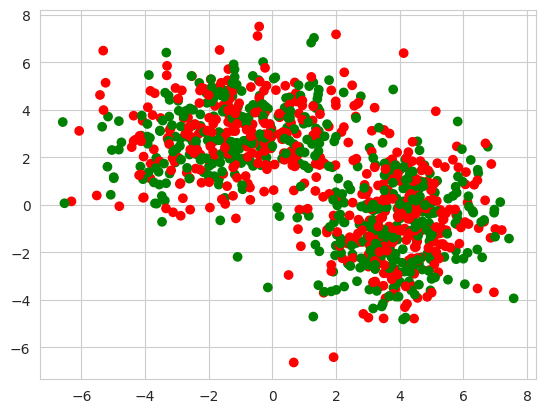

In [9]:
plt.scatter(
    x=data['x'],
    y=data['y'],
    c=data['c'],
)

plt.show()

[0.009 0.028 0.015 0.949]
[0.038 0.    0.    0.962]
[0.302 0.002 0.667 0.029]
[0.969 0.    0.009 0.022]


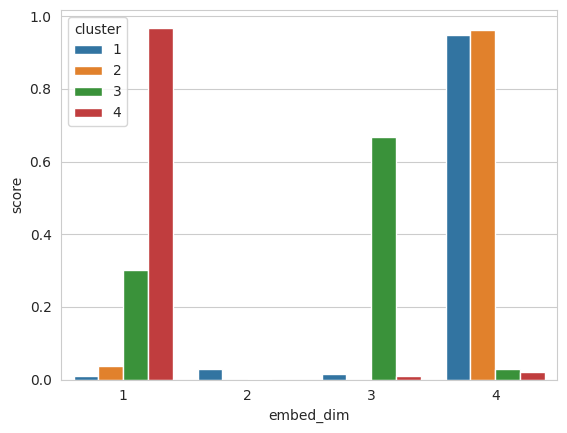

CPU times: user 1.72 s, sys: 140 ms, total: 1.86 s
Wall time: 1.66 s


In [10]:
%%time

features = {
    'x': 'normal',
    'y': 'normal',
    'c': 'categ',
}

embedder = em.EMEmbedder(
    embed_size=4,
    features=features,
    max_iter=100,
)
embedder.fit(data[features.keys()])

stats = []
for cluster, cluster_data in data.groupby('cluster'):
    stat = np.mean(embedder.transform(cluster_data), axis=0).round(3)
    stats.append(pd.Series(stat))
    print(stat)

res_df = pd.DataFrame({
    'score': pd.concat(stats),
    'embed_dim': ['1', '2', '3', '4'] * 4,
    'cluster': ['1'] * 4 + ['2'] * 4 + ['3'] * 4 + ['4'] * 4,
})

sns.barplot(
    x=res_df['embed_dim'],
    y=res_df['score'],
    hue=res_df['cluster'],
)
plt.show()

[0.    0.001 0.021 0.001 0.    0.028 0.054 0.    0.553 0.342]
[0.    0.016 0.015 0.004 0.    0.013 0.02  0.    0.441 0.49 ]
[0.001 0.049 0.886 0.025 0.008 0.001 0.002 0.    0.018 0.008]
[0.001 0.461 0.436 0.081 0.    0.    0.001 0.    0.01  0.01 ]


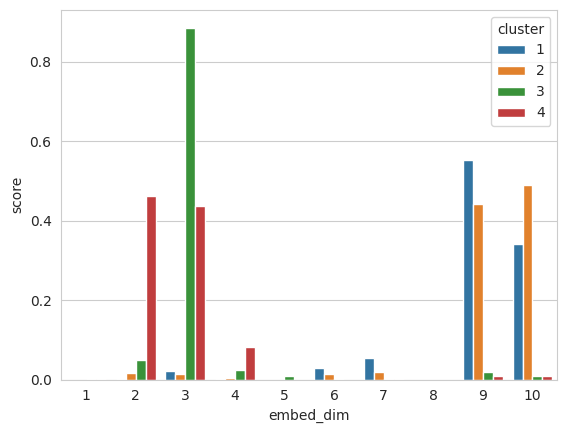

CPU times: user 3.62 s, sys: 143 ms, total: 3.77 s
Wall time: 3.57 s


In [11]:
%%time

features = {
    'x': 'normal',
    'y': 'normal',
    'c': 'categ',
}

embed_size = 10

embedder = em.EMEmbedder(
    embed_size=embed_size,
    features=features,
    max_iter=100,
)
embedder.fit(data[features.keys()])

stats = []
for cluster, cluster_data in data.groupby('cluster'):
    stat = np.mean(embedder.transform(cluster_data), axis=0).round(3)
    stats.append(pd.Series(stat))
    print(stat)

res_df = pd.DataFrame({
    'score': pd.concat(stats),
    'embed_dim': [str(i + 1) for i in range(embed_size)] * 4,
    'cluster': ['1'] * embed_size + ['2'] * embed_size + ['3'] * embed_size + ['4'] * embed_size,
})

sns.barplot(
    x=res_df['embed_dim'],
    y=res_df['score'],
    hue=res_df['cluster'],
)
plt.show()

In each dimension of embedding one or two initial cluster dominates so they are destinguishable